## CS535/EE514 - Spring 2023 - Assignment 3 - Part A - Logistic Regression

## Marks: 40
## Due Date: April 3, 2025, 23:55

## Instructions

*   Submit your code both as notebook file (.ipynb) and python script (.py) on LMS. The name of both files should be 'RollNo_PA03_A'.

*   The code MUST be implemented independently. Any plagiarism or cheating of work from others or the internet will be immediately referred to the DC.

* 10% penalty per day for 3 days after due date. No submissions will be accepted after  that.

* Use procedural programming style and comment your code properly.

* **Deadline to submit this assignment is April 3, 2025, 23:55**

* Make sure to run all blocks before submission.

### Goal:

The goal of this part of the assignment is to get you familiar with Logistic Regression and to give hands on experience of basic python tools and libraries which will be used in implementing the algorithm.

### Note:

You are <font color="red">not allowed </font> to use any other libraries than the ones imported below for this part <font color="yellow">**except if explictly allowed**</font>. You have to implement your own Logistic Regression and General Logistic Regression models from scratch. You will implement a One vs Rest (OvR) multi-class classification framework for the MNIST dataset using both models.


<b>Double click here to enter your name and roll number:  
Name: Farooq Ahmad

Roll Number: 24030021
</b>

## Required Imports

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
from keras.datasets import mnist
import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader, TensorDataset



### Section 1: Coding the LogisticRegression Class (from scratch)

In this section, you will implement the ```LogisticRegression``` class from scratch using basic Python and Numpy.


A skeleton class has been provided to help you in coding this section. You are allowed to add additional helper methods/functions (e.g to extend to mini-batch gradient descent if you find it necessary). However, you are <font color="red">not allowed </font> to modify the signature of any provided method.

Comment your code thoroughly to explain each step.


Remember to code logging of the loss over the complete training data for each epoch. You may additionally print the loss after certain epochs (say every 25 epochs) to monitor the progress.

Note: If you implement a mini-batch / stochastic gradient descent here, you are expected to randomly shuffle your training dataset before each epoch.

In [ ]:

class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=300, batch_size=64):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.weights = None
        self.bias = None
        self.loss_history = []

    def sigmoid(self, z):
      '''
      Compute the sigmoid activation function.
      '''
      return 1 / (1 + np.exp(-z))

    def cross_entropy_loss(self, y_true, y_pred):
      '''
      Compute the Binary Cross Entropy (BCE) loss.

      Parameters:
      y_true: True labels (N x 1)
      y_pred: Predicted probabilities (N x 1)

      Returns:
      Scalar loss value
      '''
      # To prevent log(0), we clip predictions to avoid 0 or 1
      eps = 1e-15
      y_pred = np.clip(y_pred, eps, 1 - eps)
      loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
      return loss

    def fit(self, x_train, y_train):
      '''
      Train the logistic regression model using Gradient Descent.

      Parameters:
      x_train: Training features (N x D)
      y_train: Training labels (N x 1)
      '''
      n_samples, n_features = x_train.shape
      self.weights = np.zeros((n_features,))
      self.bias = 0

      for epoch in range(self.epochs):
        # Shuffle the data
        indices = np.arange(n_samples)
        np.random.shuffle(indices)
        x_train = x_train[indices]
        y_train = y_train[indices]

          # Mini-batch gradient descent
        for i in range(0, n_samples, self.batch_size):
          x_batch = x_train[i:i+self.batch_size]
          y_batch = y_train[i:i+self.batch_size]

          # Forward pass
          y_pred = self.get_probs(x_batch)

          # Gradients
          error = y_pred - y_batch
          dw = np.dot(x_batch.T, error) / len(x_batch)
          db = np.mean(error)

          # Parameter update
          self.weights -= self.learning_rate * dw
          self.bias -= self.learning_rate * db

        # Logging loss after each epoch
        full_pred = self.get_probs(x_train)
        loss = self.cross_entropy_loss(y_train, full_pred)
        self.loss_history.append(loss)

        if (epoch + 1) % 25 == 0:
          print(f"Epoch {epoch+1}/{self.epochs} - Loss: {loss:.4f}")

    def predict(self, x_test):
      '''
      Predict binary labels (0 or 1) for test data.

      Parameters:
      x_test: Test features (N x D)

      Returns:
      Binary predictions (N x 1)
      '''
      probs = self.get_probs(x_test)
      return (probs >= 0.5).astype(int)

    def evaluate(self, y_true, y_pred):
      '''
      Evaluate model performance.

      Parameters:
      y_true: True labels (N x 1)
      y_pred: Predicted labels (N x 1)

      Returns:
      Dictionary containing accuracy, F1 score, and confusion matrix.
      '''
      return {
        'accuracy': accuracy_score(y_true, y_pred),
        'f1_score': f1_score(y_true, y_pred),
        'confusion_matrix': confusion_matrix(y_true, y_pred)
      }

    def get_activations(self, X):
      '''
      Return the linear combination of inputs and weights.

      Parameters:
      X : Features (N x D)

      Returns:
      Linear combination of inputs and weights (N x 1)

      '''
      return np.dot(X, self.weights) + self.bias

    def get_probs(self, X):
      '''
      Return the probabilities after passing through the sigmoid.

      Parameters:
      X : Features (N x D)

      Returns:
      Probabilities of the positive class (N x 1)
      '''
      z = self.get_activations(X)
      return self.sigmoid(z)

    def get_parameters(self):
      '''
      Returns all parameters as a dictionary (including weights, bias)
      '''
      return {
        'weights': self.weights,
        'bias': self.bias
      }

### Section 2: General Logistic Regression from Scratch



The general logistic function is the generalization of the sigmoid function, which is given mathematically as:

$$ \sigma_g(z) = \frac{L}{1+e^{-k(z-z_0)}}$$

In the case where $ L = 1, k = 1$ and $ z_0 = 0 $, this reduces to the sigmoid function. For binary classification, such that the output gives probabilities (is between 0 and 1), it is necessary to fix $ L = 1 $. However, $z_0$ and $k$ are valid learnable parameters of the model. You will implement the generalization of the logistic regression class with learnable parameters $z_0$ and $k$.

This section is similar to the previous one, except the gradient based update rules for gradient descent will change for the weights and bias. Additional updates for the learnable $z_0$ and $k$ will also have to be incorporated.

#### Deriving the gradients

Derive the new gradient update rules of the weight and the bias terms, as well as for $z_0$ and $k$. Provide the necessary steps and the final update below (in LaTeX).

<font color="green">

**Your Answer Here**
 </font>

### Derivation of Gradient Update Rules for General Logistic Regression

The general logistic function is given by:

\[
\sigma_g(z) = \frac{1}{1 + e^{-k(z - z_0)}}
\]

Let:
- \( z = Xw + b \)
- \( \hat{y} = \sigma_g(z) \)
- Binary Cross-Entropy loss:

\[
\mathcal{L} = -\frac{1}{N} \sum_{i=1}^{N} \left[y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)\right]
\]

---

### 1. Derivative of loss w.r.t. \( z \)

\[
\frac{\partial \mathcal{L}}{\partial z} = \frac{\partial \mathcal{L}}{\partial \hat{y}} \cdot \frac{d \hat{y}}{dz}
\]

We know:

\[
\frac{d \hat{y}}{dz} = \frac{d}{dz} \left( \frac{1}{1 + e^{-k(z - z_0)}} \right) = \hat{y}(1 - \hat{y}) \cdot k
\]

\[
\Rightarrow \frac{\partial \mathcal{L}}{\partial z} = (\hat{y} - y) \cdot \hat{y} (1 - \hat{y}) \cdot k
\]

---

### 2. Gradient w.r.t. Weights \( w \)

\[
\frac{\partial \mathcal{L}}{\partial w} = \frac{1}{N} \sum_{i=1}^{N} (\hat{y}_i - y_i) \cdot \hat{y}_i (1 - \hat{y}_i) \cdot k \cdot x_i
\]

---

### 3. Gradient w.r.t. Bias \( b \)

\[
\frac{\partial \mathcal{L}}{\partial b} = \frac{1}{N} \sum_{i=1}^{N} (\hat{y}_i - y_i) \cdot \hat{y}_i (1 - \hat{y}_i) \cdot k
\]

---

### 4. Gradient w.r.t. \( k \)

\[
\frac{\partial \hat{y}}{\partial k} = (z - z_0) \cdot \hat{y}(1 - \hat{y})
\]

\[
\Rightarrow \frac{\partial \mathcal{L}}{\partial k} = \frac{1}{N} \sum_{i=1}^{N} (\hat{y}_i - y_i) \cdot (z_i - z_0) \cdot \hat{y}_i (1 - \hat{y}_i)
\]

---

### 5. Gradient w.r.t. \( z_0 \)

\[
\frac{\partial \hat{y}}{\partial z_0} = -k \cdot \hat{y}(1 - \hat{y})
\]

\[
\Rightarrow \frac{\partial \mathcal{L}}{\partial z_0} = \frac{1}{N} \sum_{i=1}^{N} (\hat{y}_i - y_i) \cdot (-k) \cdot \hat{y}_i (1 - \hat{y}_i)
\]

---

### Final Update Rules

Given learning rate \( \eta \), the update rules are:

\[
w \leftarrow w - \eta \cdot \frac{\partial \mathcal{L}}{\partial w}
\]

\[
b \leftarrow b - \eta \cdot \frac{\partial \mathcal{L}}{\partial b}
\]

\[
k \leftarrow k - \eta \cdot \frac{\partial \mathcal{L}}{\partial k}
\]

\[
z_0 \leftarrow z_0 - \eta \cdot \frac{\partial \mathcal{L}}{\partial z_0}
\]


#### Coding the General Logistic Regression Class (from scratch)

In this part, you will implement the ```GeneralLogisticRegression``` class from scratch incorporating the modified gradients you derived above.

Like before, a skeleton class has been provided to help you in coding this section. You are allowed to add additional helper methods/functions (e.g to extend to mini-batch gradient descent if you find it necessary). However, you are <font color="red">not allowed </font> to modify the signature of any provided method.

Comment your code thoroughly to explain each step.

Remember to code logging of the loss over the complete training data for each epoch. You may additionally print the loss after certain epochs (say every 25 epochs) to monitor the progress.

Note: If you implement a mini-batch / stochastic gradient descent here, you are expected to randomly shuffle your training dataset before each epoch.

In [ ]:
class GeneralLogisticRegression:
    def __init__(self, learning_rate=0.01, hyperparam_lr = 0.001, epochs=300, batch_size = 64):
      self.learning_rate = learning_rate
      self.param_lr = hyperparam_lr
      self.epochs = epochs
      self.weights = None
      self.bias = None
      self.batch_size = batch_size
      self. k = 1
      self.z0 = 0
      self.loss_history = []
      self.z_e = []
      self.k_e = []

    def general_logistic(self, z):

      """
      Compute the general logistic activation function.
      """
      return 1 / (1 + np.exp(-self.k * (z - self.z0)))

    def cross_entropy_loss(self, y_true, y_pred):
      """
      Compute the Binary Cross Entropy (BCE) loss.

      Parameters:
      y_true: True labels (N x 1)
      y_pred: Predicted probabilities (N x 1)

      Returns:
      Scalar loss value
      """
      epsilon = 1e-10  # to avoid log(0)
      y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
      return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def compute_gradients(self,X,y):
      '''
      Helper function to compute gradients. You may leave this blank if you wish

      Parameters:
      X : Features (N x D)
      y: Labels (N x 1)

      Returns:
      All gradients (dw,db,dz0,dk)
      '''
      N = X.shape[0]
      z = self.get_activations(X)
      y_pred = self.general_logistic(z)

      error = y_pred - y
      y_sig_grad = y_pred * (1 - y_pred)  # derivative of sigmoid

      # Gradients
      dz = error * y_sig_grad * self.k
      dw = np.dot(X.T, dz) / N
      db = np.sum(dz) / N

      dz0 = -np.sum(error * y_sig_grad * self.k) / N
      dk = np.sum(error * y_sig_grad * (z - self.z0)) / N

      return dw, db, dz0, dk

    def fit(self, x_train, y_train):
        """
        Train the logistic regression model using Gradient Descent.
        """
        N, D = x_train.shape
        self.weights = np.zeros((D, 1))
        self.bias = 0.0

        for epoch in range(self.epochs):
            # Shuffle data
            indices = np.arange(N)
            np.random.shuffle(indices)
            x_train = x_train[indices]
            y_train = y_train[indices]

            for i in range(0, N, self.batch_size):
                x_batch = x_train[i:i + self.batch_size]
                y_batch = y_train[i:i + self.batch_size]

                dw, db, dz0, dk = self.compute_gradients(x_batch, y_batch)

                # Update parameters
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db
                self.z0 -= self.param_lr * dz0
                self.k -= self.param_lr * dk

            # Compute loss for the full dataset after epoch
            y_pred = self.general_logistic(self.get_activations(x_train))
            loss = self.cross_entropy_loss(y_train, y_pred)
            self.loss_history.append(loss)
            self.z_e.append(self.z0)
            self.k_e.append(self.k)

            if epoch % 25 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}, k: {self.k:.4f}, z0: {self.z0:.4f}")


    def predict(self, x_test):
      """
      Predict binary labels (0 or 1) for test data.

      Parameters:
      x_test: Test features (N x D)

      Returns:
      Binary predictions (N x 1)
      """
      probs = self.get_probs(x_test)
      return (probs >= 0.5).astype(int)

    def evaluate(self, y_true, y_pred):
      """
      Evaluate model performance.

      Parameters:
      y_true: True labels (N x 1)
      y_pred: Predicted labels (N x 1)

      Returns:
      Dictionary containing accuracy, F1 score, and confusion matrix.
      """
      return {
          'accuracy': accuracy_score(y_true, y_pred),
          'f1_score': f1_score(y_true, y_pred),
          'confusion_matrix': confusion_matrix(y_true, y_pred)
      }

    def get_activations(self, X):
      """
      Return the linear combination of inputs and weights.

      Parameters:
      X : Features (N x D)

      Returns:
      Linear combination of inputs and weights (N x 1)

      """
      return np.dot(X, self.weights) + self.bias

    def get_probs(self, X):
      """
      Return the probabilities after passing through the sigmoid.

      Parameters:
      X : Features (N x D)

      Returns:
      Probabilities of the positive class (N x 1)
      """
      z = self.get_activations(X)
      return self.general_logistic(z)

    def get_parameters(self):
      '''
      Returns all parameters as a dictionary (including weights, bias, k, and z0)
      '''
      return {
          'weights': self.weights,
          'bias': self.bias,
          'k': self.k,
          'z0': self.z0
      }

### Section 3: Loading and Processing the Dataset

#### The MNIST Dataset:
The MNIST Handwritten Digit Recognition Dataset contains 70,000 images of handwritten digits (0-9):  60,000 for training and 10,000 for testing. The images are grayscale, 28x28 pixels, and centered to reduce preprocessing. The dataset is balanced for multi-class classification i.e. all digits appear equally in the training dataset. Consequently, it is not balanced for the OvR model. In this part you will load, preprocess and balance MNIST, finally producing ten balanced datasets, one for each of the OvR classifiers.


You are to follow these steps:
1. Load the MNIST Dataset from ```keras.datasets```
2. Normalize using ```StandardScaler```
3. Oversample to balance:
> Create 10 balanced datasets by augmenting the positive class (you are expected to explore different data augmentation techniques [for example random horizontal and vertical shift, random crop]) such that its equal to the negative class (other digits). You are allowed to import libraries providing such augmentations. [recommended: Look into torchvision's transform library]

Please rationalize your choice of augmentations (Why did you choose these augmentations and not others?).




In [ ]:


# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data

# Define augmentation transforms

# Dictionary to store datasets for each digit
# digit_datasets = {}
# Apply transformations for each digit and store test and train data (don't augment the test data)



# Reshape and normalize
x_train = x_train.reshape(-1, 28*28).astype(np.float32)
x_test = x_test.reshape(-1, 28*28).astype(np.float32)

# Normalize using StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Convert back to 28x28 for augmentation
x_train_img = x_train.reshape(-1, 28, 28)
x_test_img = x_test.reshape(-1, 28, 28)

# Define augmentation transforms for positive class
augmentation = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomAffine(degrees=10, translate=(0.1, 0.1)),  # random shift
    transforms.RandomCrop(28, padding=2),                      # random crop with padding
    transforms.ToTensor()
])

def augment_images(images, target_count):
    augmented = []
    while len(augmented) < target_count:
        for img in images:
            transformed = augmentation(img.numpy())
            augmented.append(transformed.view(28*28).numpy())
            if len(augmented) >= target_count:
                break
    return np.array(augmented)

# Create 10 balanced datasets (OvR)
digit_datasets = {}

for digit in range(10):
    # One-vs-Rest labels
    y_binary = (y_train == digit).astype(int)

    # Split into positive and negative samples
    pos_idx = np.where(y_binary == 1)[0]
    neg_idx = np.where(y_binary == 0)[0]

    X_pos = torch.tensor(x_train_img[pos_idx])
    X_neg = x_train[neg_idx]
    y_neg = y_binary[neg_idx]

    # Augment positive samples
    needed = len(neg_idx) - len(pos_idx)
    X_pos_aug = augment_images(X_pos, needed)
    X_pos_orig = x_train[pos_idx]
    y_pos = y_binary[pos_idx]

    # Concatenate original + augmented positive samples
    X_balanced = np.vstack((X_neg, X_pos_orig, X_pos_aug))
    y_balanced = np.hstack((y_neg, y_pos, np.ones(len(X_pos_aug))))

    # Shuffle the dataset
    indices = np.random.permutation(len(y_balanced))
    X_balanced = X_balanced[indices]
    y_balanced = y_balanced[indices].reshape(-1, 1)

    # Save in dictionary
    digit_datasets[digit] = {
        'X_train': X_balanced,
        'y_train': y_balanced,
        'X_test': x_test,
        'y_test': (y_test == digit).astype(int).reshape(-1, 1)
    }

    print(f"Digit {digit}: Positives after balancing = {np.sum(y_balanced==1)}, Negatives = {np.sum(y_balanced==0)}")


Digit 0: Positives after balancing = 54077, Negatives = 54077
Digit 1: Positives after balancing = 53258, Negatives = 53258
Digit 2: Positives after balancing = 54042, Negatives = 54042
Digit 3: Positives after balancing = 53869, Negatives = 53869
Digit 4: Positives after balancing = 54158, Negatives = 54158
Digit 5: Positives after balancing = 54579, Negatives = 54579
Digit 6: Positives after balancing = 54082, Negatives = 54082
Digit 7: Positives after balancing = 53735, Negatives = 53735
Digit 8: Positives after balancing = 54149, Negatives = 54149
Digit 9: Positives after balancing = 54051, Negatives = 54051


<font color="green"> Answer Here </font> <br>
Augmentations Used <br>
-RandomAffine(degrees=10, translate=(0.1, 0.1))<br>
-RandomCrop(28, padding=2)<br>

These were chosen because they simulate realistic handwriting variations.<br>
-RandomAffine helps with slight rotations and shifts, making the model more robust to natural digit slants or positioning.<br>
-RandomCrop introduces spatial shifts without altering the digit’s shape, mimicking off-center writing.<br>

Did not choose others because <br>
-RandomHorizontalFlip is not necessary as the model is designed to handle both left and right digit orientations<br>
-RandomVerticalFlip is not necessary as the model is designed to handle both top and bottom digit orientations<br>
-Avoided flips since digits like 6 and 9 are not symmetric.<br>
-Color jitter doesn’t apply to grayscale images.<br>
-Noise was skipped to avoid corrupting digits.<br>
-Advanced techniques like CutMix or MixUp could create unnatural digit combinations.



### Section 4: Running and Saving the Model Weights, Activations, Predictions, and Metrics for Logistic OvR and General Logistic OvR

Train both the LogisticRegression and GeneralLogisticRegression models in an OvR framework on the MNIST dataset. Save the outputs for analysis.


* Train 10 binary classifiers (one per digit) for each framework.

Save the following for each model (20 in total):
* The model itself
* Model weights.
* Activations (output probabilities).
* Predictions (1/0).
* Metrics (accuracy, F1-score, confusion matrix) on the test set.


You may change the training epochs, and learning rates to get the best results but they must remain invariant across all the different classifiers in both OvR frameworks. Keep default initialization of $k$ (1) and $z_0$ (0) for general logistic regression.

You should expect a high accuracy of the binary classifiers as well as the OvR framework (high 90s and high 80s respectively). It should take less than 30 minutes to train all classifiers.

In [ ]:
models_logistic = {}
models_general_logistic = {}

# Convert labels to binary for OvR
# Train Logistic Regression
# Train General Logistic Regression

Training classifiers for digit 0...
Epoch 1, Loss: 0.1429
Epoch 50, Loss: 0.0253
Epoch 1, Loss: 0.3178
Epoch 50, Loss: 0.0428
Training classifiers for digit 1...
Epoch 1, Loss: 0.1525
Epoch 50, Loss: 0.0320
Epoch 1, Loss: 0.3265
Epoch 50, Loss: 0.0512
Training classifiers for digit 2...
Epoch 1, Loss: 0.1705
Epoch 50, Loss: 0.0635
Epoch 1, Loss: 0.3386
Epoch 50, Loss: 0.0781
Training classifiers for digit 3...
Epoch 1, Loss: 0.1867
Epoch 50, Loss: 0.0771
Epoch 1, Loss: 0.3583
Epoch 50, Loss: 0.0899
Training classifiers for digit 4...
Epoch 1, Loss: 0.1743
Epoch 50, Loss: 0.0482
Epoch 1, Loss: 0.3552
Epoch 50, Loss: 0.0648
Training classifiers for digit 5...
Epoch 1, Loss: 0.1986
Epoch 50, Loss: 0.0793
Epoch 1, Loss: 0.3726
Epoch 50, Loss: 0.0986
Training classifiers for digit 6...
Epoch 1, Loss: 0.1484
Epoch 50, Loss: 0.0383
Epoch 1, Loss: 0.3142
Epoch 50, Loss: 0.0615
Training classifiers for digit 7...
Epoch 1, Loss: 0.1630
Epoch 50, Loss: 0.0491
Epoch 1, Loss: 0.3266
Epoch 50, Loss:

In [ ]:
# re defining the GeneralLogisticRegression class
class GeneralLogisticRegression:
    def __init__(self, learning_rate=0.01, hyperparam_lr=0.001, epochs=300, batch_size=64):
        self.learning_rate = learning_rate
        self.param_lr = hyperparam_lr
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.batch_size = batch_size
        self.k = 1
        self.z0 = 0
        self.loss_history = []
        self.z_e = []
        self.k_e = []

    def general_logistic(self, z):
        """Compute the general logistic activation function."""
        return 1 / (1 + np.exp(-self.k * (z - self.z0)))

    def cross_entropy_loss(self, y_true, y_pred):
        """Compute the Binary Cross Entropy (BCE) loss."""
        epsilon = 1e-10  # to avoid log(0)
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def compute_gradients(self, X, y):
        '''Compute gradients for weights, bias, z0, and k.'''
        N = X.shape[0]
        z = self.get_activations(X)
        y_pred = self.general_logistic(z)

        error = y_pred - y
        y_sig_grad = y_pred * (1 - y_pred)  # derivative of sigmoid

        # Gradients
        dz = error * y_sig_grad * self.k
        dw = np.dot(X.T, dz) / N
        db = np.sum(dz) / N

        dz0 = -np.sum(error * y_sig_grad * self.k) / N
        dk = np.sum(error * y_sig_grad * (z - self.z0)) / N

        return dw, db, dz0, dk

    def fit(self, x_train, y_train):
        """Train the model using Gradient Descent."""
        N, D = x_train.shape
        # Initialize weights as 1D array
        self.weights = np.zeros(D)
        self.bias = 0.0

        for epoch in range(self.epochs):
            # Shuffle data
            indices = np.arange(N)
            np.random.shuffle(indices)
            x_train = x_train[indices]
            y_train = y_train[indices]

            for i in range(0, N, self.batch_size):
                x_batch = x_train[i:i + self.batch_size]
                y_batch = y_train[i:i + self.batch_size]

                dw, db, dz0, dk = self.compute_gradients(x_batch, y_batch)

                # Update parameters
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db
                self.z0 -= self.param_lr * dz0
                self.k -= self.param_lr * dk

            # Compute loss for the full dataset after epoch
            y_pred = self.general_logistic(self.get_activations(x_train))
            loss = self.cross_entropy_loss(y_train, y_pred)
            self.loss_history.append(loss)
            self.z_e.append(self.z0)
            self.k_e.append(self.k)

            if epoch % 25 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}, k: {self.k:.4f}, z0: {self.z0:.4f}")

    def predict(self, x_test):
        """Predict binary labels (0 or 1) for test data."""
        probs = self.get_probs(x_test)
        return (probs >= 0.5).astype(int)

    def evaluate(self, y_true, y_pred):
        """Evaluate model performance."""
        return {
            'accuracy': accuracy_score(y_true, y_pred),
            'f1_score': f1_score(y_true, y_pred),
            'confusion_matrix': confusion_matrix(y_true, y_pred)
        }

    def get_activations(self, X):
        """Return the linear combination of inputs and weights."""
        return np.dot(X, self.weights) + self.bias

    def get_probs(self, X):
        """Return the probabilities after passing through the sigmoid."""
        z = self.get_activations(X)
        return self.general_logistic(z)

    def get_parameters(self):
        '''Returns all parameters as a dictionary.'''
        return {
            'weights': self.weights,
            'bias': self.bias,
            'k': self.k,
            'z0': self.z0
        }

# Training code for Section 4
models_logistic = {}
models_general_logistic = {}

# Training parameters
epochs = 50
learning_rate = 0.01
batch_size = 64

for digit in range(10):
    print(f"Training classifiers for digit {digit}...")

    # Get the balanced dataset for this digit
    X_train = digit_datasets[digit]['X_train']
    y_train = digit_datasets[digit]['y_train'].ravel()  # Flatten to 1D array
    X_test = digit_datasets[digit]['X_test']
    y_test = digit_datasets[digit]['y_test'].ravel()

    # Train Logistic Regression
    lr_model = LogisticRegression(learning_rate=learning_rate, epochs=epochs, batch_size=batch_size)
    lr_model.fit(X_train, y_train)

    # Train General Logistic Regression
    glr_model = GeneralLogisticRegression(learning_rate=learning_rate, epochs=epochs, batch_size=batch_size)
    glr_model.fit(X_train, y_train)

    # Make predictions and evaluate
    lr_pred = lr_model.predict(X_test)
    lr_metrics = lr_model.evaluate(y_test, lr_pred)

    glr_pred = glr_model.predict(X_test)
    glr_metrics = glr_model.evaluate(y_test, glr_pred)

    # Get probabilities/activations
    lr_probs = lr_model.get_probs(X_test)
    lr_activations = lr_model.get_activations(X_test)

    glr_probs = glr_model.get_probs(X_test)
    glr_activations = glr_model.get_activations(X_test)

    # Store all information
    models_logistic[digit] = {
        'model': lr_model,
        'weights': lr_model.get_parameters()['weights'],
        'bias': lr_model.get_parameters()['bias'],
        'activations': lr_activations,
        'probabilities': lr_probs,
        'predictions': lr_pred,
        'metrics': lr_metrics,
        'loss_history': lr_model.loss_history
    }

    models_general_logistic[digit] = {
        'model': glr_model,
        'weights': glr_model.get_parameters()['weights'],
        'bias': glr_model.get_parameters()['bias'],
        'k': glr_model.get_parameters()['k'],
        'z0': glr_model.get_parameters()['z0'],
        'activations': glr_activations,
        'probabilities': glr_probs,
        'predictions': glr_pred,
        'metrics': glr_metrics,
        'loss_history': glr_model.loss_history,
        'k_history': glr_model.k_e,
        'z0_history': glr_model.z_e
    }

print("Training complete.")

Training classifiers for digit 0...
Epoch 25/50 - Loss: 0.0336
Epoch 50/50 - Loss: 0.0293
Epoch 0, Loss: 0.2362, k: 1.0267, z0: 0.0518
Epoch 25, Loss: 0.0709, k: 1.3100, z0: 0.2184
Training classifiers for digit 1...
Epoch 25/50 - Loss: 0.0409
Epoch 50/50 - Loss: 0.0349
Epoch 0, Loss: 0.2471, k: 1.0313, z0: 0.0566
Epoch 25, Loss: 0.0923, k: 1.3275, z0: 0.2147
Training classifiers for digit 2...
Epoch 25/50 - Loss: 0.0486
Epoch 50/50 - Loss: 0.0455
Epoch 0, Loss: 0.2251, k: 1.0294, z0: 0.0560
Epoch 25, Loss: 0.0779, k: 1.2886, z0: 0.2096
Training classifiers for digit 3...
Epoch 25/50 - Loss: 0.0547
Epoch 50/50 - Loss: 0.0507
Epoch 0, Loss: 0.2366, k: 1.0281, z0: 0.0585
Epoch 25, Loss: 0.0852, k: 1.3119, z0: 0.2227
Training classifiers for digit 4...
Epoch 25/50 - Loss: 0.0589
Epoch 50/50 - Loss: 0.0544
Epoch 0, Loss: 0.2678, k: 1.0296, z0: 0.0584
Epoch 25, Loss: 0.1076, k: 1.3413, z0: 0.2164
Training classifiers for digit 5...
Epoch 25/50 - Loss: 0.0667
Epoch 50/50 - Loss: 0.0625
Epoch

#### Ensemble Binary Classification Models into an OvR classifier

Write a function that takes a list of probabilities from all (10) binary classifiers and returns the predictions (the class with the highest probability). Use this to convert the logistic regression and general regression classifiers outputs on both the training and test set to labels from 0-9. Report the classification metrics (accuracy, F1-score, confusion matrix) on each set.



In [ ]:
import numpy as np

def ensemble_predictions(probabilities_list):
  """
  Convert a list of probabilities from OvR classifiers into final class predictions.
  """
  pass


def evaluate_ensemble(y_true,y_pred):
  '''
  Report the classification metrics (accuracy, F1-score, confusion matrix) on each set.
  '''
  pass

# Evaluate both OvR classifiers

Ensembled predictions computed.
Ensemble Model Performance:
Logistic Regression:
Ensembled Metrics:
Metrics:
Accuracy: 0.864
F1 Score: 0.8710707499168479
Confusion Matrix:
[[ 972    0    0    1    0    2    4    1    0    0]
 [  11 1106    3    0    0    2    4    0    9    0]
 [ 122    7  861    5    6    1    5    9   15    1]
 [ 108    0   16  857    0    8    2    6   11    2]
 [  75    4    2    0  876    0    2    1    4   18]
 [ 115    3    0   31   10  708    6    2   16    1]
 [  67    3    3    0    8   15  861    0    1    0]
 [  72    6   11    4    5    2    0  912    2   14]
 [ 215    7    4    9    7   21   11    4  694    2]
 [ 158    4    0    4   25    4    0   17    4  793]]
General Logistic Regression:
Ensembled Metrics:
Metrics:
Accuracy: 0.8631
F1 Score: 0.8708575526501372
Confusion Matrix:
[[ 970    0    0    1    0    3    4    2    0    0]
 [  16 1102    3    0    0    1    4    0    9    0]
 [ 126    4  863    6    4    0    4    8   14    3]
 [ 108    0   13 

In [ ]:
def ensemble_predictions(probabilities_list):
    """
    Convert a list of probabilities from OvR classifiers into final class predictions.

    Args:
        probabilities_list: List of arrays where each array contains probabilities
                           for one class (length 10 for MNIST digits 0-9)

    Returns:
        Array of predicted class labels (0-9)
    """
    # Stack probabilities into a matrix (samples x classes)
    prob_matrix = np.column_stack(probabilities_list)

    # Predict class with highest probability
    return np.argmax(prob_matrix, axis=1)

def evaluate_ensemble(y_true, y_pred):
    '''
    Report the classification metrics (accuracy, F1-score, confusion matrix) on each set.

    Args:
        y_true: True labels (0-9)
        y_pred: Predicted labels (0-9)

    Returns:
        Dictionary containing accuracy, F1 score, and confusion matrix
    '''
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'f1_score': f1_score(y_true, y_pred, average='macro'),
        'confusion_matrix': confusion_matrix(y_true, y_pred)
    }

# Get TRUE test labels (0-9)
y_test_true = np.argmax(np.column_stack([digit_datasets[d]['y_test'] for d in range(10)]), axis=1)

# Get probabilities for all digits for both models
lr_probs_list = [models_logistic[d]['probabilities'].ravel() for d in range(10)]
glr_probs_list = [models_general_logistic[d]['probabilities'].ravel() for d in range(10)]

# Make ensemble predictions
lr_ensemble_pred = ensemble_predictions(lr_probs_list)
glr_ensemble_pred = ensemble_predictions(glr_probs_list)

# Evaluate ensemble models
lr_ensemble_metrics = evaluate_ensemble(y_test_true, lr_ensemble_pred)
glr_ensemble_metrics = evaluate_ensemble(y_test_true, glr_ensemble_pred)

print("Ensembled predictions computed.")
print("Ensemble Model Performance:")
print("Logistic Regression:")
print("Ensembled Metrics:")
print("Metrics:")
print(f"Accuracy: {lr_ensemble_metrics['accuracy']:.4f}")
print(f"F1 Score: {lr_ensemble_metrics['f1_score']:.4f}")
print("Confusion Matrix:")
print(lr_ensemble_metrics['confusion_matrix'])

print("\nGeneral Logistic Regression:")
print("Ensembled Metrics:")
print("Metrics:")
print(f"Accuracy: {glr_ensemble_metrics['accuracy']:.4f}")
print(f"F1 Score: {glr_ensemble_metrics['f1_score']:.4f}")
print("Confusion Matrix:")
print(glr_ensemble_metrics['confusion_matrix'])

Ensembled predictions computed.
Ensemble Model Performance:
Logistic Regression:
Ensembled Metrics:
Metrics:
Accuracy: 0.9067
F1 Score: 0.9055
Confusion Matrix:
[[ 956    0    2    2    1    5   10    2    2    0]
 [   0 1100    2    6    1    2    4    2   18    0]
 [  13   15  904   15   13    4   13   17   33    5]
 [   5    0   23  910    3   26    3   12   18   10]
 [   1    8    6    3  903    1    9    4   11   36]
 [  10    5    3   41   13  765   15   13   20    7]
 [   7    4    4    2   13   16  906    5    1    0]
 [   3   21   19    5    9    1    2  934    2   32]
 [  13   23   10   16   17   35   13   14  822   11]
 [  13    9    2   19   56   11    0   27    5  867]]

General Logistic Regression:
Ensembled Metrics:
Metrics:
Accuracy: 0.9004
F1 Score: 0.8988
Confusion Matrix:
[[ 960    0    2    1    0    5    8    2    2    0]
 [   0 1104    3    4    1    1    5    1   16    0]
 [  16   14  878   15   11    3   37   18   31    9]
 [   5    4   22  912    3   20    5   

In [ ]:
# Evaluate all binary classifiers

Logistic Regression OvR Performance:
Digit 0:
Metrics:
Accuracy: 0.9916
F1 Score: 0.9574468085106383
Confusion Matrix:
[[8971   49]
 [  35  945]]
Digit 1:
Metrics:
Accuracy: 0.9937
F1 Score: 0.9723076923076923
Confusion Matrix:
[[8831   34]
 [  29 1106]]
Digit 2:
Metrics:
Accuracy: 0.9802
F1 Score: 0.8983572895277208
Confusion Matrix:
[[8927   41]
 [ 157  875]]
Digit 3:
Metrics:
Accuracy: 0.9768
F1 Score: 0.8817533129459735
Confusion Matrix:
[[8903   87]
 [ 145  865]]
Digit 4:
Metrics:
Accuracy: 0.983
F1 Score: 0.9116424116424117
Confusion Matrix:
[[8953   65]
 [ 105  877]]
Digit 5:
Metrics:
Accuracy: 0.9772
F1 Score: 0.8660399529964747
Confusion Matrix:
[[9035   73]
 [ 155  737]]
Digit 6:
Metrics:
Accuracy: 0.986
F1 Score: 0.9263932702418507
Confusion Matrix:
[[8979   63]
 [  77  881]]
Digit 7:
Metrics:
Accuracy: 0.9832
F1 Score: 0.9166666666666666
Confusion Matrix:
[[8908   64]
 [ 104  924]]
Digit 8:
Metrics:
Accuracy: 0.9619
F1 Score: 0.7916894477856752
Confusion Matrix:
[[8895  131

In [ ]:
# Evaluate all binary classifiers
print("Logistic Regression OvR Performance:")
for digit in range(10):
    print(f"Digit {digit}:")
    print("Metrics:")
    metrics = models_logistic[digit]['metrics']
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"F1 Score: {metrics['f1_score']}")
    print("Confusion Matrix:")
    print(metrics['confusion_matrix'])
    print()

print("General Logistic Regression OvR Performance:")
for digit in range(10):
    print(f"Digit {digit}:")
    print("Metrics:")
    metrics = models_general_logistic[digit]['metrics']
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"F1 Score: {metrics['f1_score']}")
    print("Confusion Matrix:")
    print(metrics['confusion_matrix'])
    print()

Logistic Regression OvR Performance:
Digit 0:
Metrics:
Accuracy: 0.9836
F1 Score: 0.9181636726546906
Confusion Matrix:
[[8916  104]
 [  60  920]]

Digit 1:
Metrics:
Accuracy: 0.9844
F1 Score: 0.9321148825065274
Confusion Matrix:
[[8773   92]
 [  64 1071]]

Digit 2:
Metrics:
Accuracy: 0.9751
F1 Score: 0.8732824427480916
Confusion Matrix:
[[8893   75]
 [ 174  858]]

Digit 3:
Metrics:
Accuracy: 0.9724
F1 Score: 0.8587512794268168
Confusion Matrix:
[[8885  105]
 [ 171  839]]

Digit 4:
Metrics:
Accuracy: 0.9675
F1 Score: 0.8309932397295892
Confusion Matrix:
[[8876  142]
 [ 183  799]]

Digit 5:
Metrics:
Accuracy: 0.9663
F1 Score: 0.8028086600351082
Confusion Matrix:
[[8977  131]
 [ 206  686]]

Digit 6:
Metrics:
Accuracy: 0.9806
F1 Score: 0.8983228511530398
Confusion Matrix:
[[8949   93]
 [ 101  857]]

Digit 7:
Metrics:
Accuracy: 0.9784
F1 Score: 0.8930693069306931
Confusion Matrix:
[[8882   90]
 [ 126  902]]

Digit 8:
Metrics:
Accuracy: 0.9563
F1 Score: 0.7618528610354224
Confusion Matrix:
[

### Section 5: Comparison and Analysis




Plot the following:

* Figure with subplots (10,1) of histograms of the activations (before logistic function) of each OvR framework
* Figure with subplots (10,1) of histograms of the probabilities of each OvR framework
* Figure with subplots (10,1) of weight maps (2D map-like images (28x28) of the weights) of each classifier
* Figure with subplots (10,1) of evolution of $z_0$ and k for the general logistic framework
* Figure with suplots (10,1) of loss curves for both logistic and general logistic models

Also print the difference in the bias terms corresponding to each (logistic,general logistic) classification model pair (i.e. difference for class 0, class 1 and so on)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#{Code Here}

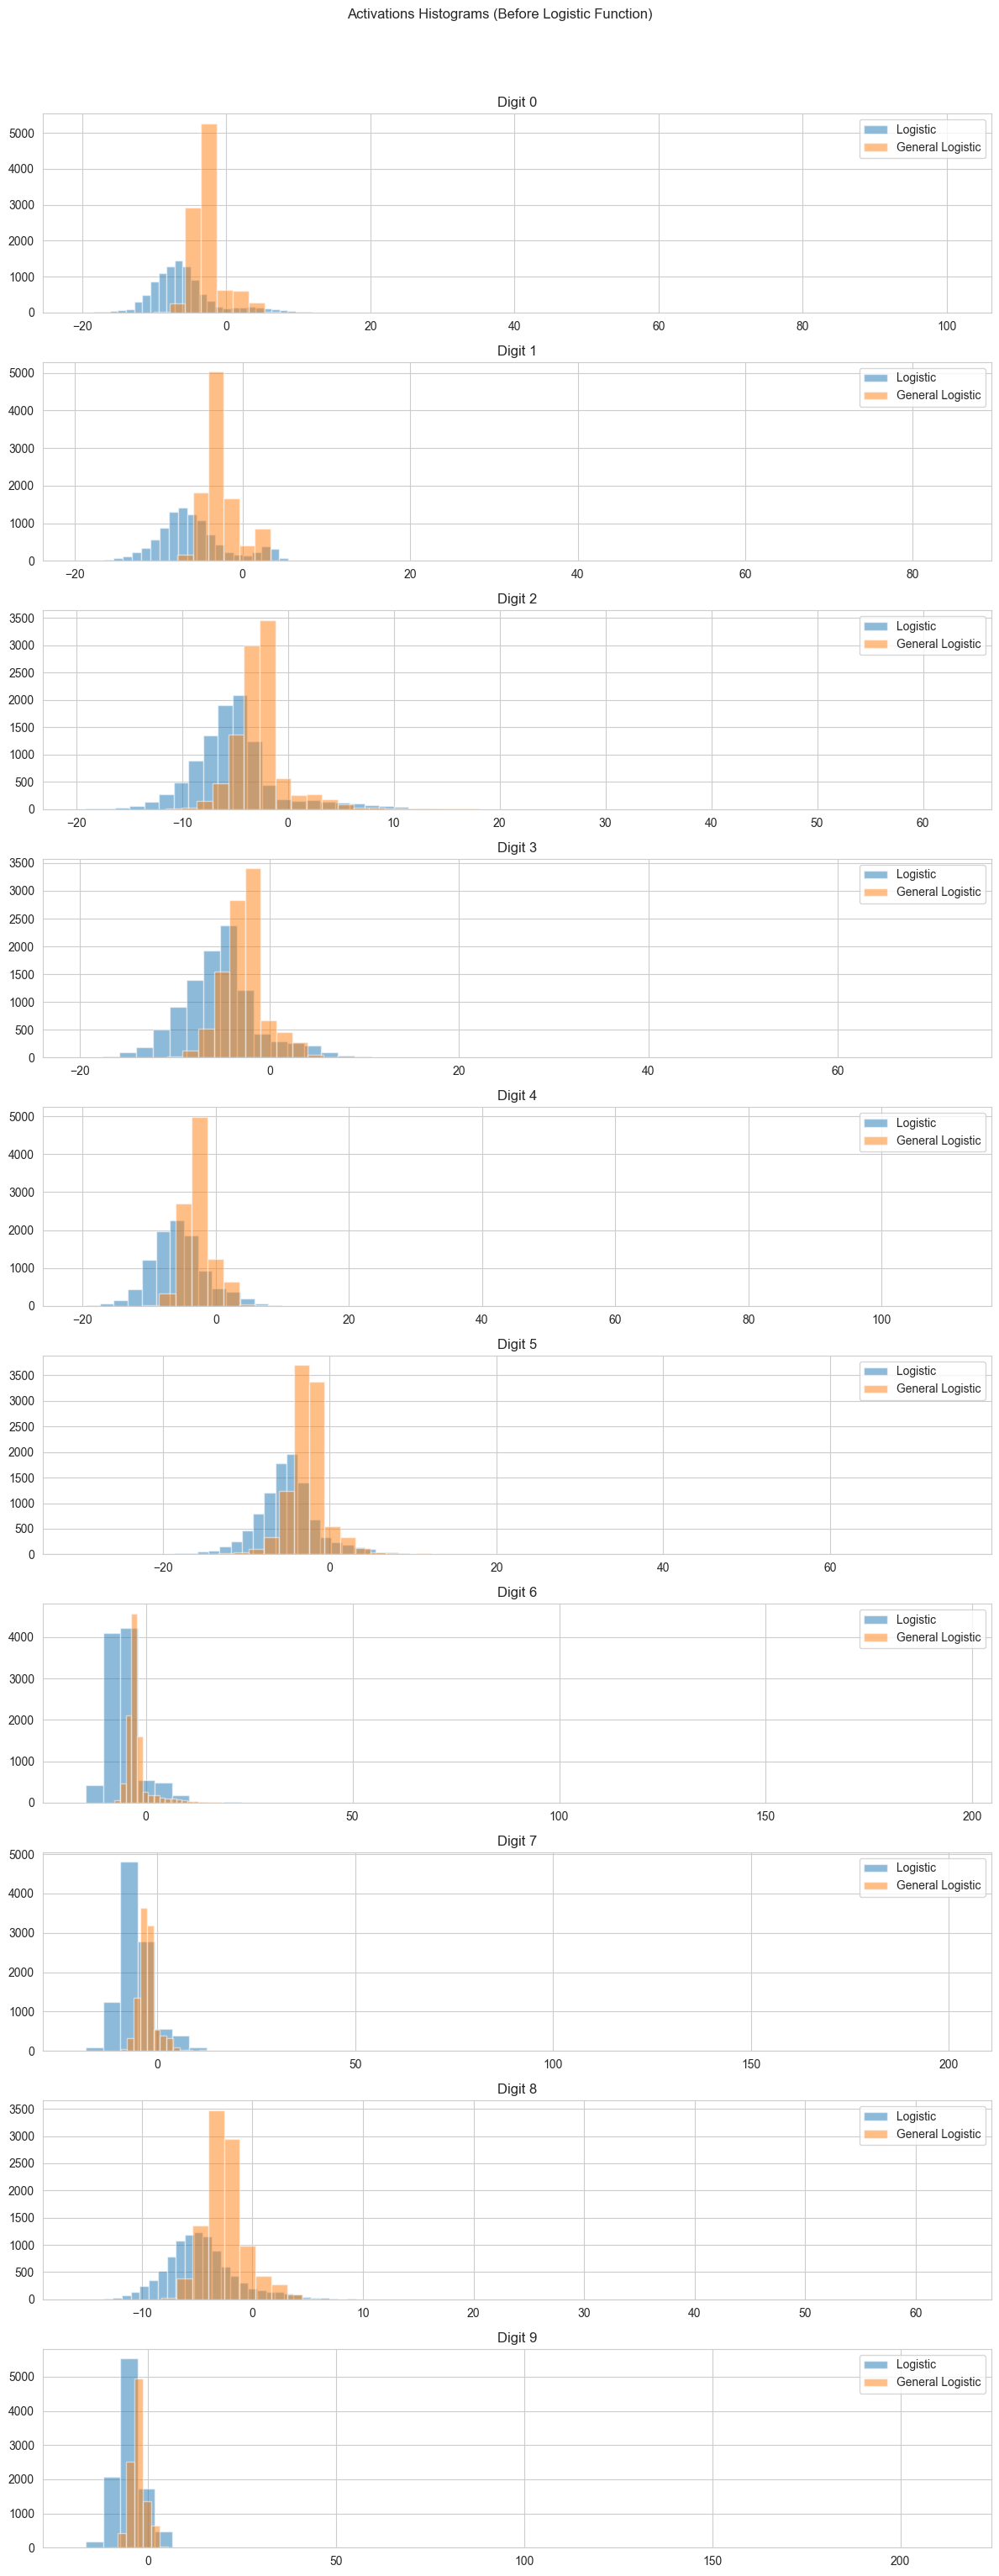

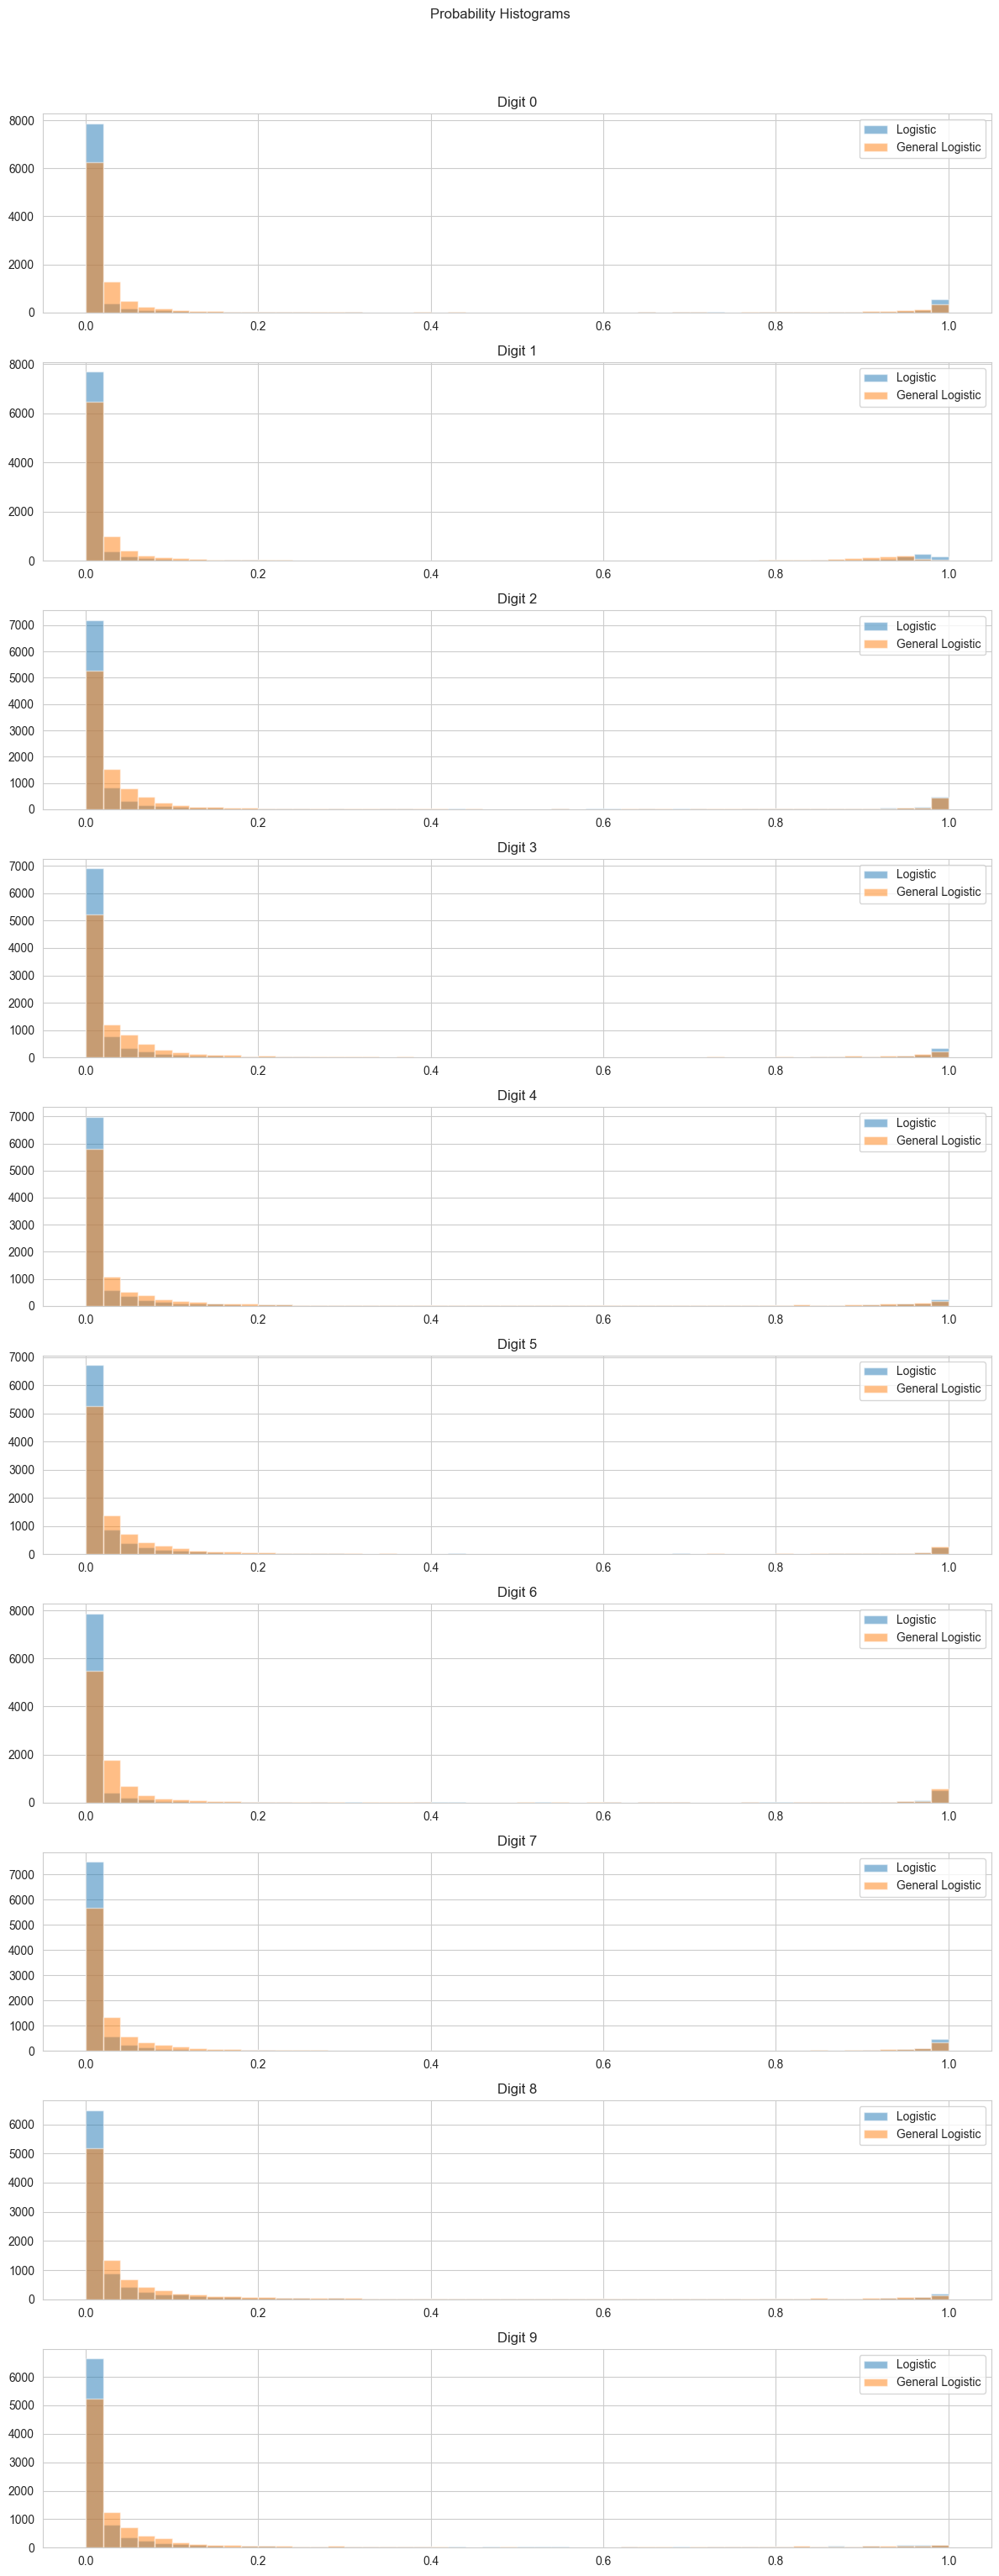

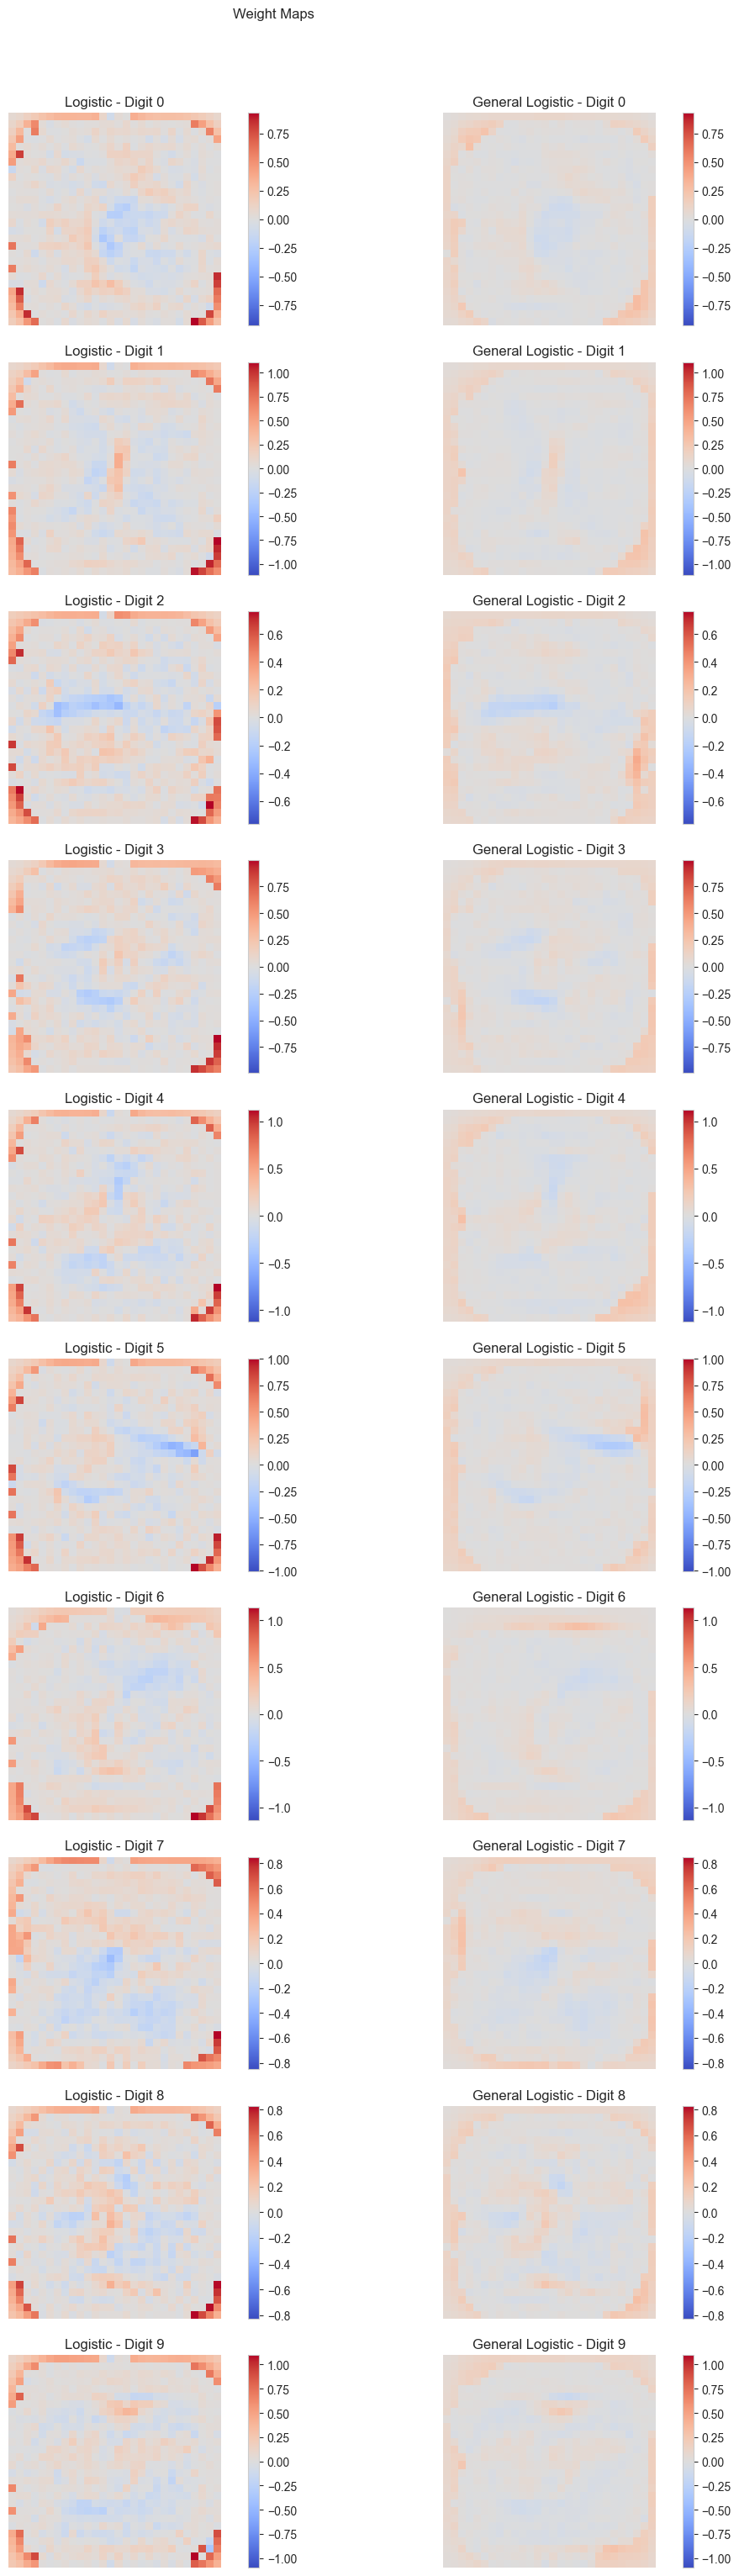

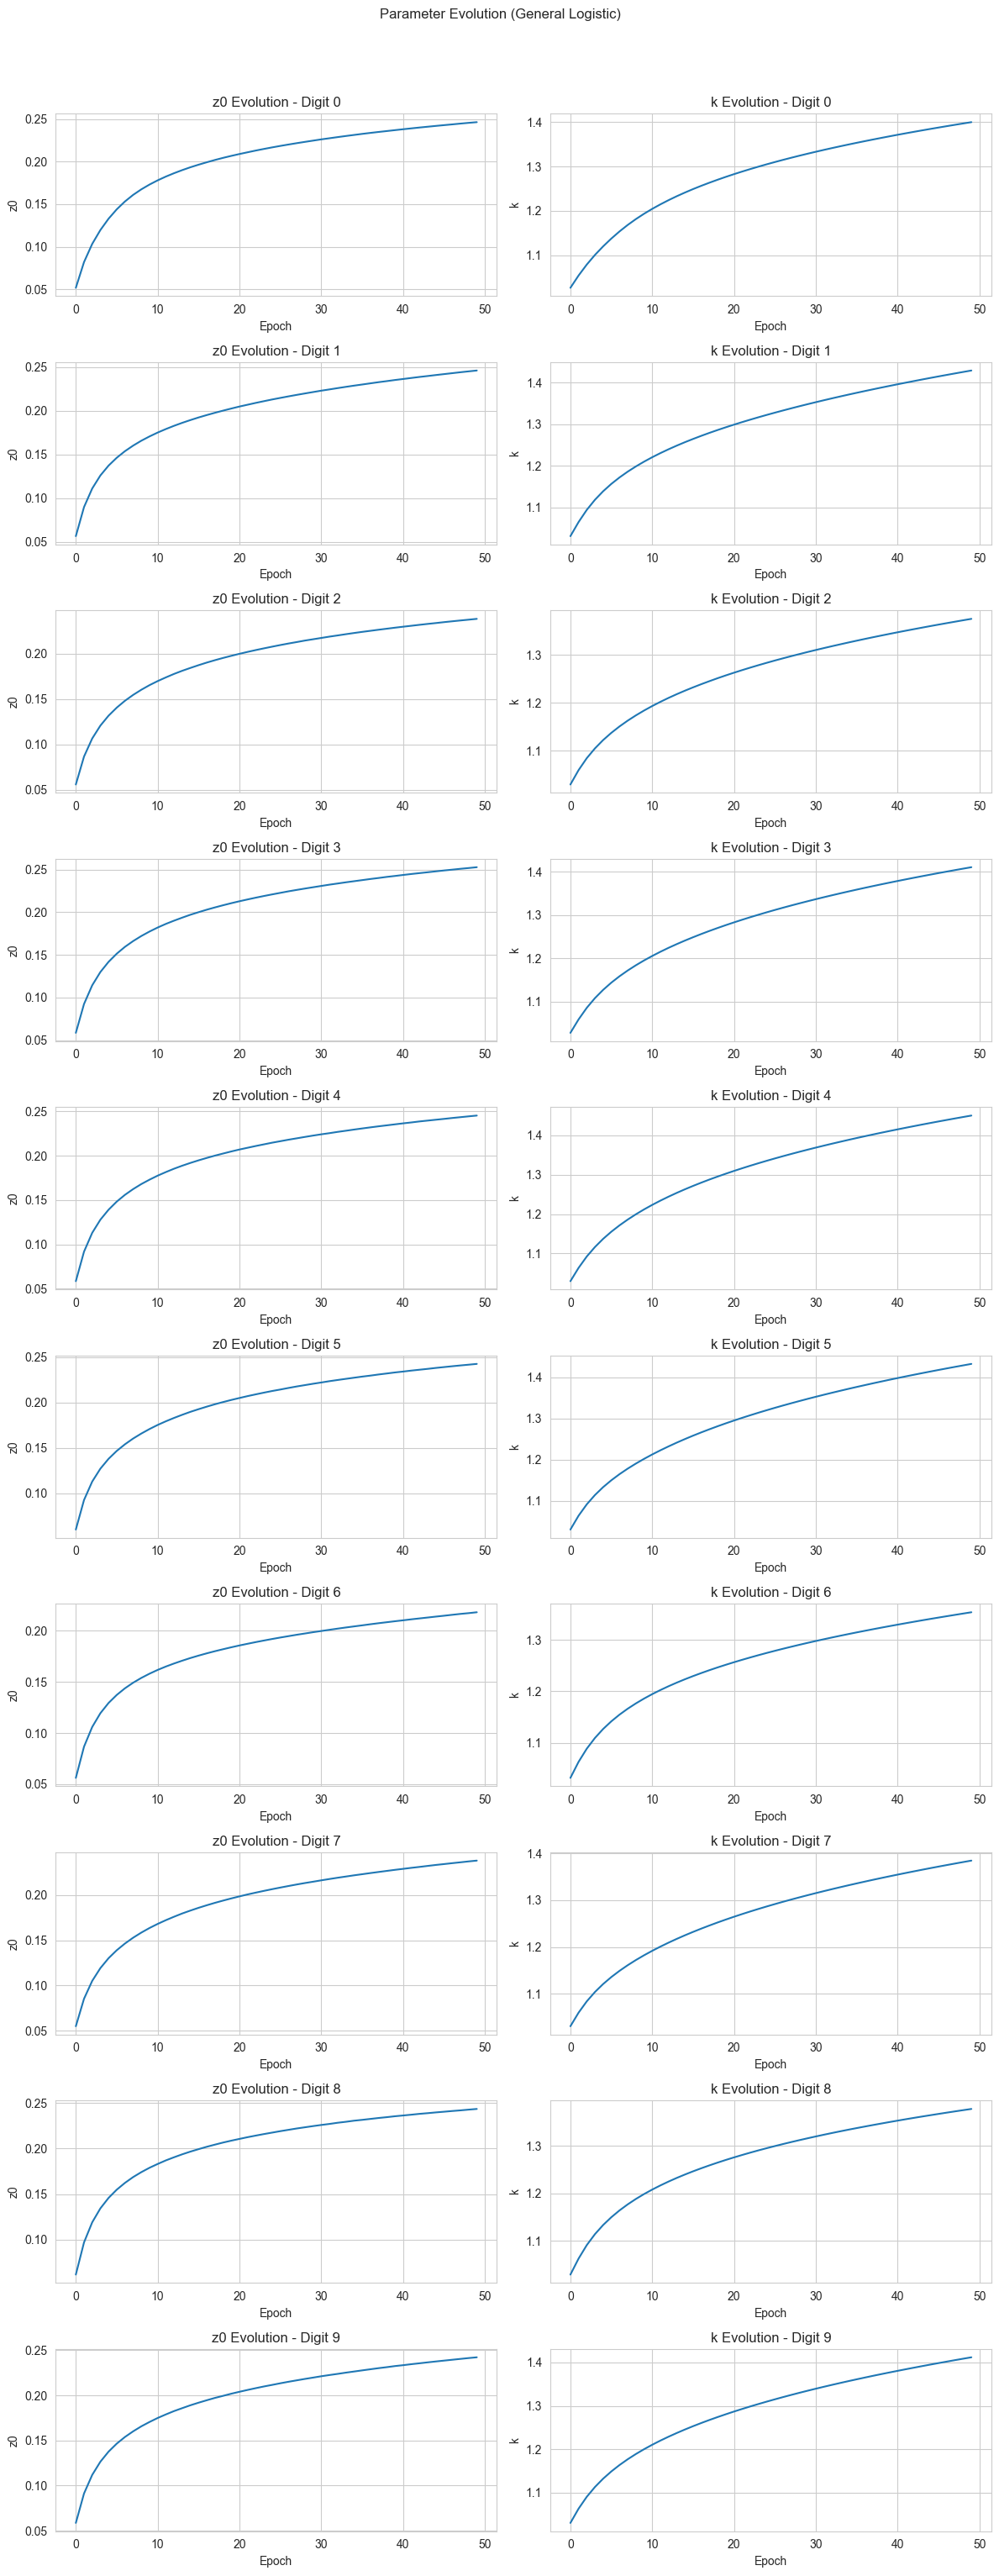

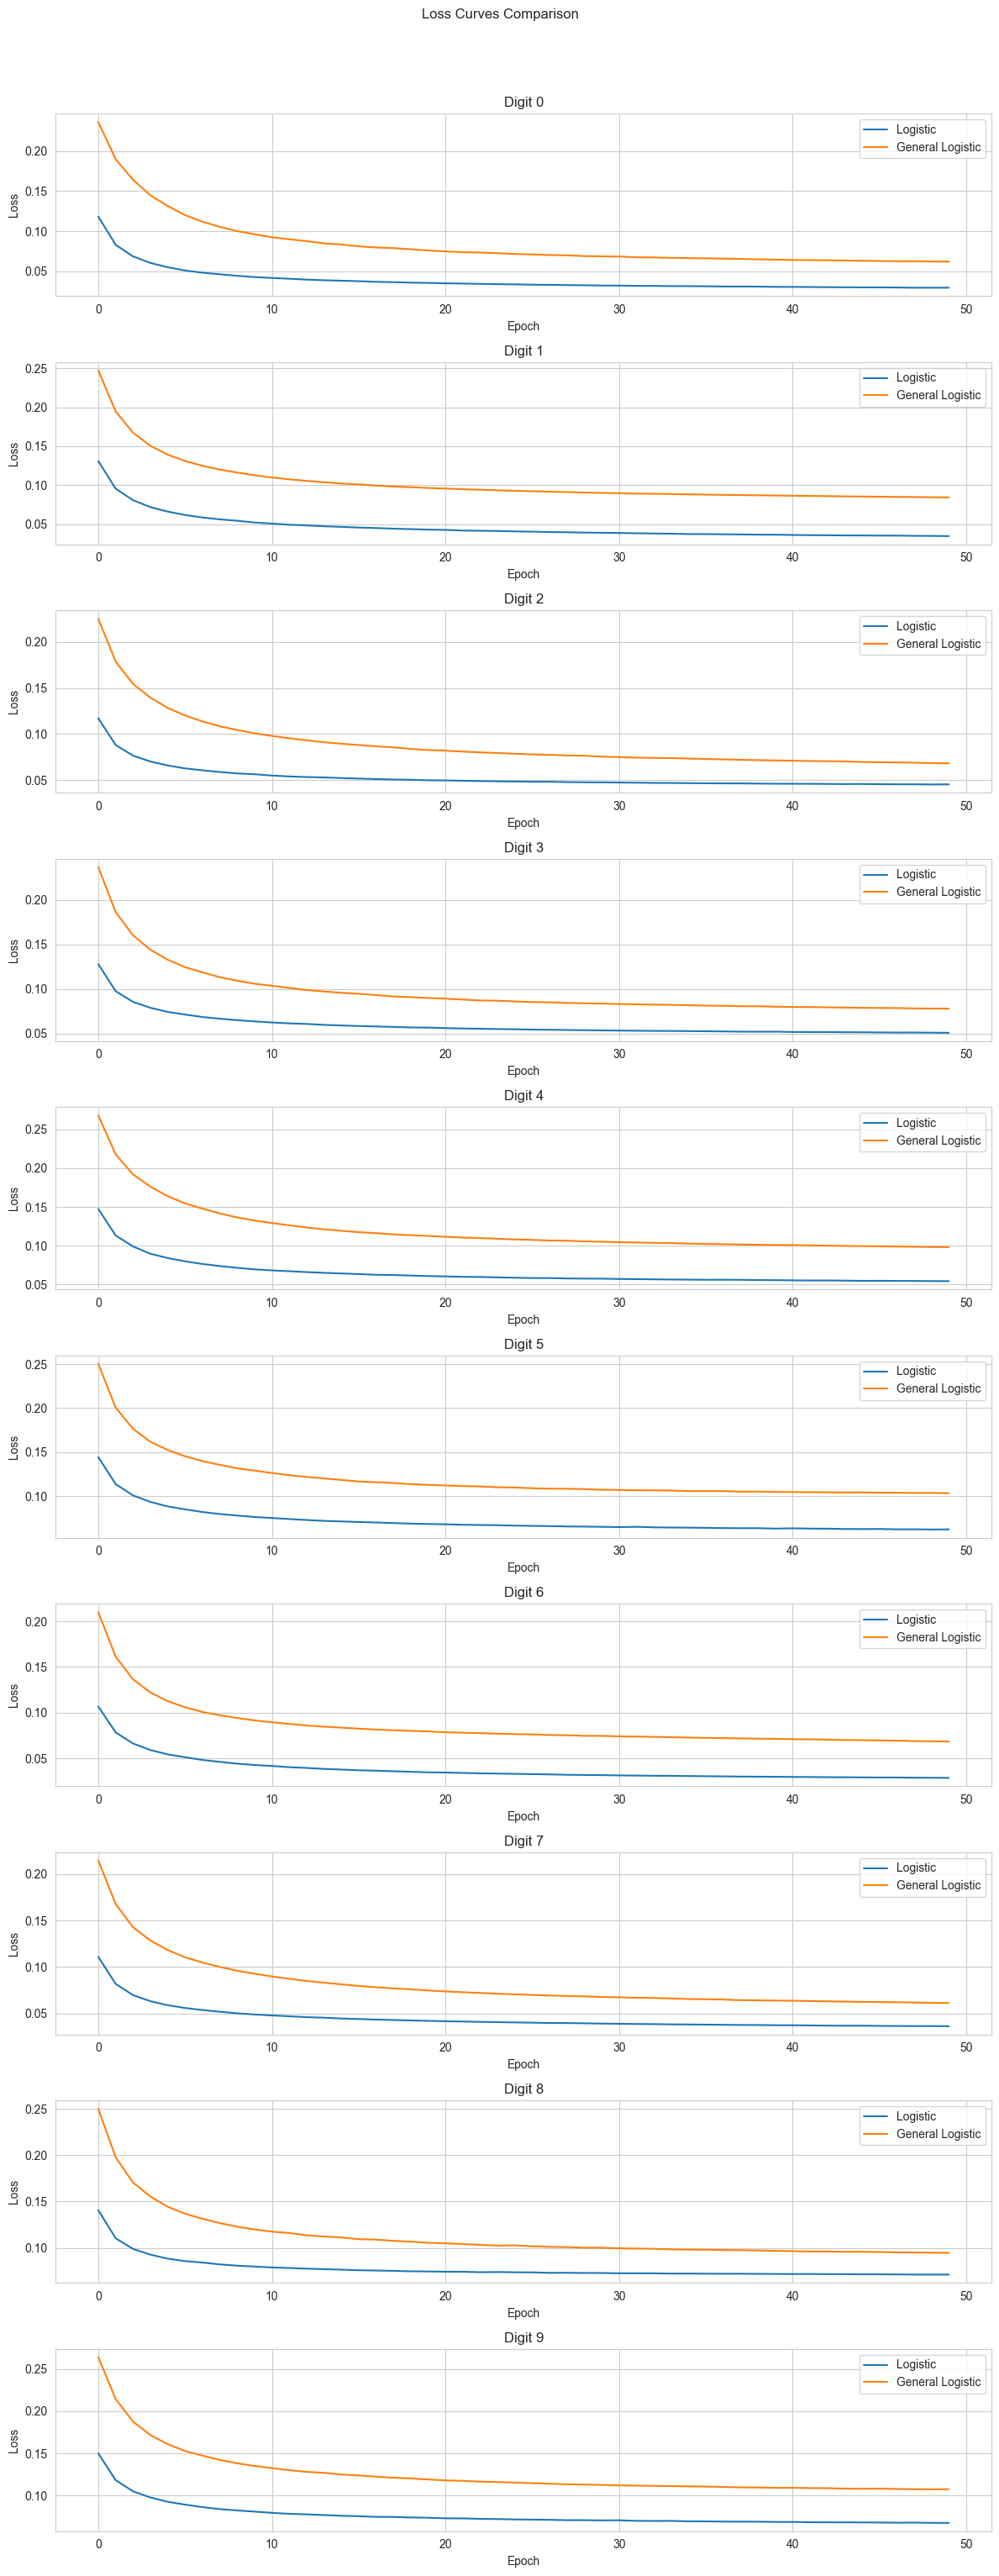


Bias Term Differences (Logistic - General Logistic):
Digit 0: -3.4096
Digit 1: -3.3758
Digit 2: -2.5616
Digit 3: -2.6413
Digit 4: -3.0104
Digit 5: -2.5231
Digit 6: -3.0781
Digit 7: -2.8851
Digit 8: -2.2095
Digit 9: -2.4603


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Set the style using seaborn
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [12, 8]

# 1. Histograms of activations (before logistic function)
fig1, axes1 = plt.subplots(10, 1, figsize=(12, 30))
fig1.suptitle('Activations Histograms (Before Logistic Function)', y=1.02)
for digit in range(10):
    # Logistic Regression
    lr_acts = models_logistic[digit]['activations']
    # General Logistic Regression
    glr_acts = models_general_logistic[digit]['activations']

    axes1[digit].hist(lr_acts, bins=50, alpha=0.5, label='Logistic')
    axes1[digit].hist(glr_acts, bins=50, alpha=0.5, label='General Logistic')
    axes1[digit].set_title(f'Digit {digit}')
    axes1[digit].legend()
plt.tight_layout()
plt.show()

# 2. Histograms of probabilities
fig2, axes2 = plt.subplots(10, 1, figsize=(12, 30))
fig2.suptitle('Probability Histograms', y=1.02)
for digit in range(10):
    # Logistic Regression
    lr_probs = models_logistic[digit]['probabilities']
    # General Logistic Regression
    glr_probs = models_general_logistic[digit]['probabilities']

    axes2[digit].hist(lr_probs, bins=50, alpha=0.5, label='Logistic')
    axes2[digit].hist(glr_probs, bins=50, alpha=0.5, label='General Logistic')
    axes2[digit].set_title(f'Digit {digit}')
    axes2[digit].legend()
plt.tight_layout()
plt.show()

# 3. Weight maps (28x28 images)
fig3, axes3 = plt.subplots(10, 2, figsize=(12, 30))
fig3.suptitle('Weight Maps', y=1.02)
for digit in range(10):
    # Logistic Regression weights
    lr_weights = models_logistic[digit]['weights'].reshape(28, 28)
    # General Logistic Regression weights
    glr_weights = models_general_logistic[digit]['weights'].reshape(28, 28)

    # Normalize for better visualization
    vmax = max(np.abs(lr_weights).max(), np.abs(glr_weights).max())

    im0 = axes3[digit, 0].imshow(lr_weights, cmap='coolwarm', vmin=-vmax, vmax=vmax)
    axes3[digit, 0].set_title(f'Logistic - Digit {digit}')
    axes3[digit, 0].axis('off')
    fig3.colorbar(im0, ax=axes3[digit, 0])

    im1 = axes3[digit, 1].imshow(glr_weights, cmap='coolwarm', vmin=-vmax, vmax=vmax)
    axes3[digit, 1].set_title(f'General Logistic - Digit {digit}')
    axes3[digit, 1].axis('off')
    fig3.colorbar(im1, ax=axes3[digit, 1])
plt.tight_layout()
plt.show()

# 4. Evolution of z0 and k parameters
fig4, axes4 = plt.subplots(10, 2, figsize=(12, 30))
fig4.suptitle('Parameter Evolution (General Logistic)', y=1.02)
for digit in range(10):
    # z0 history
    z0_history = models_general_logistic[digit]['z0_history']
    # k history
    k_history = models_general_logistic[digit]['k_history']

    axes4[digit, 0].plot(z0_history)
    axes4[digit, 0].set_title(f'z0 Evolution - Digit {digit}')
    axes4[digit, 0].set_xlabel('Epoch')
    axes4[digit, 0].set_ylabel('z0')

    axes4[digit, 1].plot(k_history)
    axes4[digit, 1].set_title(f'k Evolution - Digit {digit}')
    axes4[digit, 1].set_xlabel('Epoch')
    axes4[digit, 1].set_ylabel('k')
plt.tight_layout()
plt.show()

# 5. Loss curves comparison
fig5, axes5 = plt.subplots(10, 1, figsize=(12, 30))
fig5.suptitle('Loss Curves Comparison', y=1.02)
for digit in range(10):
    # Logistic Regression loss
    lr_loss = models_logistic[digit]['loss_history']
    # General Logistic Regression loss
    glr_loss = models_general_logistic[digit]['loss_history']

    axes5[digit].plot(lr_loss, label='Logistic')
    axes5[digit].plot(glr_loss, label='General Logistic')
    axes5[digit].set_title(f'Digit {digit}')
    axes5[digit].legend()
    axes5[digit].set_xlabel('Epoch')
    axes5[digit].set_ylabel('Loss')
plt.tight_layout()
plt.show()

# Print bias term differences
print("\nBias Term Differences (Logistic - General Logistic):")
for digit in range(10):
    lr_bias = models_logistic[digit]['bias']
    glr_bias = models_general_logistic[digit]['bias']
    print(f"Digit {digit}: {lr_bias - glr_bias:.4f}")

Now answer the following:

* Observe the weight maps. How do they differ between the two different models?

* How do k and $z_0$ evolve from the default logistic (k = 1, $z_0$ = 0)? Do they converge to some steady value over the epochs?

* Compare the histograms of activations and probabilities between the Logistic and General Logistic OvR frameworks. Are there noticeable differences in spread or concentration? Based on the differences in activations and probabilities, what advantages does the General Logistic function offer over the standard sigmoid?

* What trend do you observe in the bias terms for Logistic and General Logistic models across the 10 digits?

* Does the learnable general logistic function harm or hurt performance as compared to the sigmoid function? You may comment based on the results of the binary classifiers and the overall OvR classifer using the two different functions, as well as the loss curves for both.


<font color="green"> Answer Here </font><br>

# Inference Using Gradio App

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr
from scipy.special import softmax
gradio_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((28,28)),
    transforms.Grayscale(),
    ]
)

def predict_sketch(sketch):
  sketch = sketch["composite"]
  test_imgT = np.array(gradio_transforms(sketch)).flatten().reshape(1,-1)
  test_imgT = scaler.transform(test_imgT)
  predictions = np.zeros(10)
  for digit in range(10):
    model = ...      # Code these according to the way you saved your model
    prediction = ... # Code these according to the way you saved your model
    predictions[digit] = ... # Set the prediction
  predictions = np.array(predictions)
  result = ...        # Get the final result (digit)
  return int(result), {f'Digit {i}': float(softmax(predictions)[i]) for i in range(10)}

iface = gr.Interface(fn=predict_sketch,
                     inputs=gr.Sketchpad(crop_size=(256,256), type='numpy', image_mode='L', brush=gr.Brush()),
                     outputs=[gr.Number(label="Predicted Digit"), gr.Label(num_top_classes=10, label="Confidence Scores")],
                     ).launch(debug=True)
# Remember to change the brush color to white before inference